In [1]:

import sys
from pathlib import Path

project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Project root added to path: {project_root}")

Project root added to path: /Users/akhileshvangala/Desktop/fixed_serpy


In [2]:
import pandas as pd
import numpy as np

In [3]:

from src.preprocessing import preprocess

In [4]:
df = pd.read_csv('../data/raw/manhattan.csv')

In [5]:
df_preprocessed = preprocess(df, train=True)



[STEP 1] Loading and preprocessing data...


In [6]:
df_preprocessed.shape

(3539, 48)

In [7]:
df_preprocessed.columns

Index(['rent', 'bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym',
       'neighborhood_Battery Park City', 'neighborhood_Central Harlem',
       'neighborhood_Central Park South', 'neighborhood_Chelsea',
       'neighborhood_Chinatown', 'neighborhood_East Harlem',
       'neighborhood_East Village', 'neighborhood_Financial District',
       'neighborhood_Flatiron', 'neighborhood_Gramercy Park',
       'neighborhood_Greenwich Village', 'neighborhood_Hamilton Heights',
       'neighborhood_Inwood', 'neighborhood_Little Italy',
       'neighborhood_Long Island City', 'neighborhood_Lower East Side',
       'neighborhood_Manhattanville', 'neighborhood_Midtown',
       'neighborhood_Midtown East', 'neighborhood_Midtown South',
       'neighborhood_Midtown West', 'neighborhood_Morningside Heights',
       'neighborhood_Nolita', '

In [8]:
df_preprocessed.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Stuyvesant Town/PCV,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Harlem,neighborhood_West Village,log_size_sqft
0,2550,0,1,480,9,2,17,1,1,0,...,False,False,False,False,True,False,False,False,False,6.175867
1,11500,2,2,2000,4,1,96,0,0,0,...,False,False,False,False,False,False,False,False,False,7.601402
2,4500,1,1,916,2,51,29,0,1,0,...,False,False,False,False,False,False,False,False,False,6.821107
3,4795,1,1,975,3,8,31,0,0,0,...,False,False,False,False,False,False,False,False,False,6.883463
4,17500,2,2,3500,3,4,136,0,0,0,...,False,True,False,False,False,False,False,False,False,8.160804


In [9]:
import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from src.modeling import train_test_split_df, train_model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'r2': r2_score(y_test, y_pred),
        'rmse': mean_squared_error(y_test, y_pred) ** 0.5,
        'mae': mean_absolute_error(y_test, y_pred)
    }


In [10]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split_df(df_preprocessed, 'rent')



[STEP 2] Train/Validation/Test Split (70.0%/15.0%/15.0%)...


In [11]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (2477, 47)
X_val shape: (531, 47)
X_test shape: (531, 47)
y_train shape: (2477,)
y_val shape: (531,)
y_test shape: (531,)


In [12]:
model_lr, _, _ = train_model('linear_regression', X_train, y_train, X_val, y_val)



   [3a] Linear Regression...
      Model training time: 0.0079 seconds


In [13]:
model_rf, _, _ = train_model('random_forest', X_train, y_train, X_val, y_val)



   [3b] Random Forest...


      Model training time: 2.0967 seconds


/opt/anaconda3/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:466: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [14]:
model_xgb, _, _ = train_model('xgboost', X_train, y_train, X_val, y_val)



   [3c] XGBoost (with early stopping)...
      Model training time: 0.1625 seconds


In [15]:
model_lr

LinearRegression()

In [16]:
model_rf

RandomForestRegressor(n_estimators=200, random_state=42, warm_start=True)

In [17]:
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [18]:
results = {}
results["Linear Regression"] = evaluate_model(model_lr, X_test, y_test)
results["Random Forest"] = evaluate_model(model_rf, X_test, y_test)
results["XGBoost"] = evaluate_model(model_xgb, X_test, y_test)

In [19]:
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(4)


In [20]:
comparison_df


,r2,rmse,mae
Linear Regression,0.7838,1468.5437,873.5118
Random Forest,0.8029,1402.2501,757.1621
XGBoost,0.8128,1366.4419,769.0880


In [21]:
joblib.dump(model_xgb, '../outputs/models/best_model.pkl')
'../outputs/models/best_model.pkl'

'../outputs/models/best_model.pkl'

In [22]:
X_train.columns.tolist()

['bedrooms',
 'bathrooms',
 'size_sqft',
 'min_to_subway',
 'floor',
 'building_age_yrs',
 'no_fee',
 'has_roofdeck',
 'has_washer_dryer',
 'has_doorman',
 'has_elevator',
 'has_dishwasher',
 'has_patio',
 'has_gym',
 'neighborhood_Battery Park City',
 'neighborhood_Central Harlem',
 'neighborhood_Central Park South',
 'neighborhood_Chelsea',
 'neighborhood_Chinatown',
 'neighborhood_East Harlem',
 'neighborhood_East Village',
 'neighborhood_Financial District',
 'neighborhood_Flatiron',
 'neighborhood_Gramercy Park',
 'neighborhood_Greenwich Village',
 'neighborhood_Hamilton Heights',
 'neighborhood_Inwood',
 'neighborhood_Little Italy',
 'neighborhood_Long Island City',
 'neighborhood_Lower East Side',
 'neighborhood_Manhattanville',
 'neighborhood_Midtown',
 'neighborhood_Midtown East',
 'neighborhood_Midtown South',
 'neighborhood_Midtown West',
 'neighborhood_Morningside Heights',
 'neighborhood_Nolita',
 'neighborhood_Roosevelt Island',
 'neighborhood_Soho',
 'neighborhood_Stuyve

In [23]:
import shap


In [24]:
explainer = shap.TreeExplainer(model_xgb)


In [25]:
shap_values = explainer.shap_values(X_test)


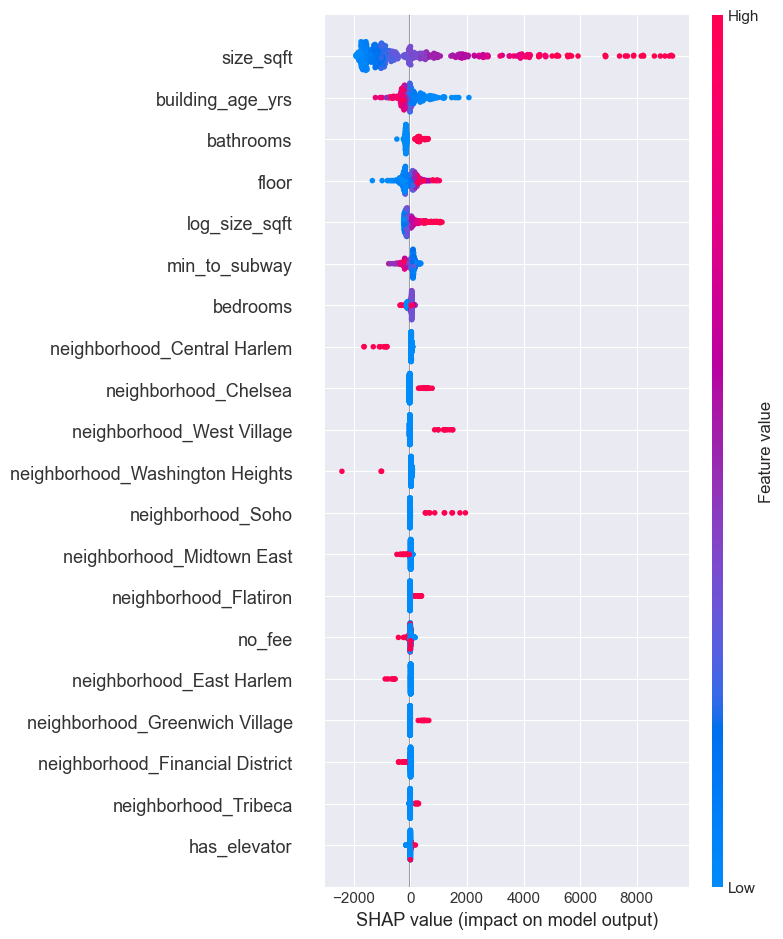

In [26]:
shap.summary_plot(shap_values, X_test)


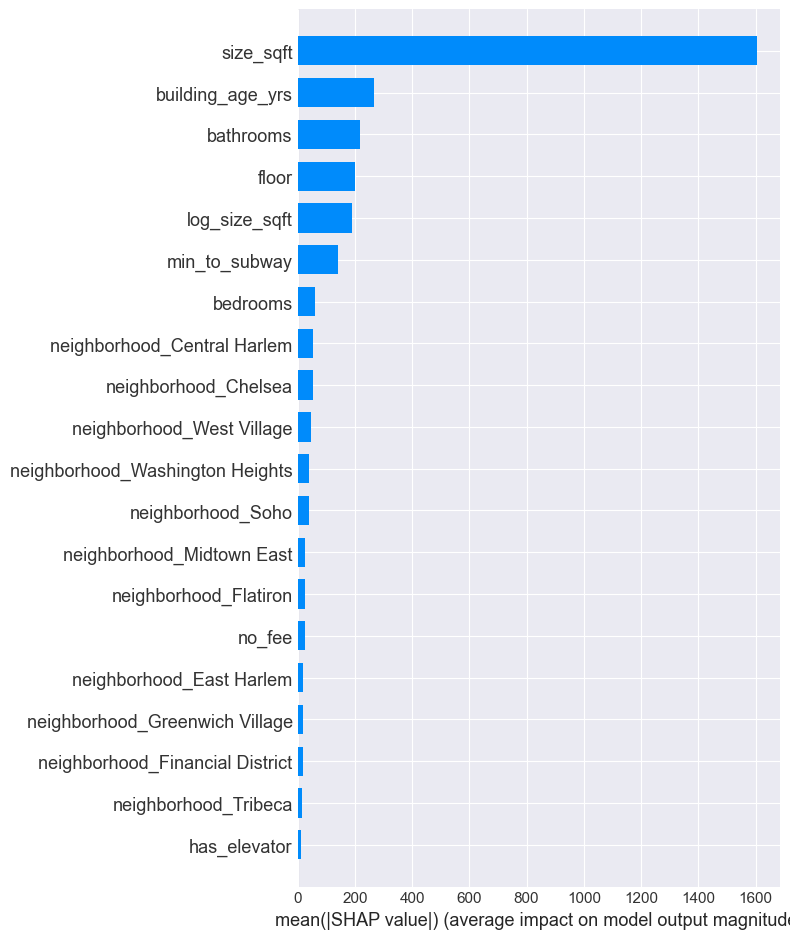

In [27]:
shap.summary_plot(shap_values, X_test, plot_type='bar')
